# Letter recognition (small size)

> Indeed, I once even proposed that the toughest challenge facing AI workers is to answer the question: “What are the letters ‘A’ and ‘I’? - [Douglas R. Hofstadter](https://web.stanford.edu/group/SHR/4-2/text/hofstadter.html) (1995)


## notMNIST


Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

![](http://yaroslavvb.com/upload/notMNIST/nmn.png)

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.


## So, why not MNIST?

Many introductions to image classification with deep learning start with MNIST, a standard dataset of handwritten digits. This is unfortunate. Not only does it not produce a “Wow!” effect or show where deep learning shines, but it also can be solved with shallow machine learning techniques. In this case, plain k-Nearest Neighbors produces more than 97% accuracy (or even 99.5% with some data preprocessing!). Moreover, MNIST is not a typical image dataset – and mastering it is unlikely to teach you transferable skills that would be useful for other classification problems

> Many good ideas will not work well on MNIST (e.g. batch norm). Inversely many bad ideas may work on MNIST and no[t] transfer to real [computer vision]. - [François Chollet’s tweet](https://twitter.com/fchollet/status/852594987527045120)

## Keras Update

In [1]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [3]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [4]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2024-04-02 06:31:14--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat’

notMNIST_small.mat  100%[===================>] 112.14M  41.6MB/s    in 2.7s    

2024-04-02 06:31:17 (41.6 MB/s) - ‘notMNIST_small.mat’ saved [117586976/117586976]



In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import io

## Data Loading

In [6]:
data = io.loadmat('notMNIST_small.mat')

In [9]:
x = data['images']
y = data['labels']

In [10]:
x.shape, y.shape

((28, 28, 18724), (18724,))

In [11]:
resolution = 28
classes = 10

x = np.transpose(x, (2, 0, 1))
print(x.shape)

(18724, 28, 28)


In [12]:
x = x.reshape( (-1, resolution, resolution, 1) )

In [13]:
print(x.shape)

(18724, 28, 28, 1)


In [14]:
# sample, x, y, channel
x.shape, y.shape

((18724, 28, 28, 1), (18724,))

* 데이터 살펴보기

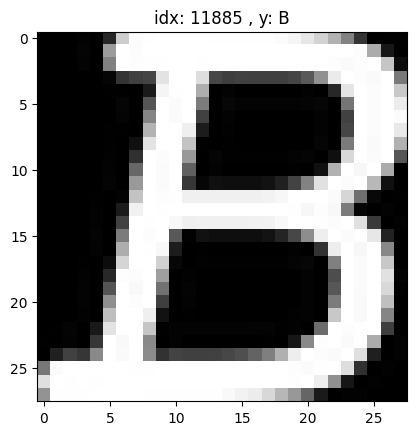

In [15]:
rand_i = np.random.randint(0, x.shape[0])

plt.title( f'idx: {rand_i} , y: {"ABCDEFGHIJ"[ int(y[rand_i]) ]}' )
plt.imshow( x[rand_i, :, :, 0], cmap='gray' )
plt.show()

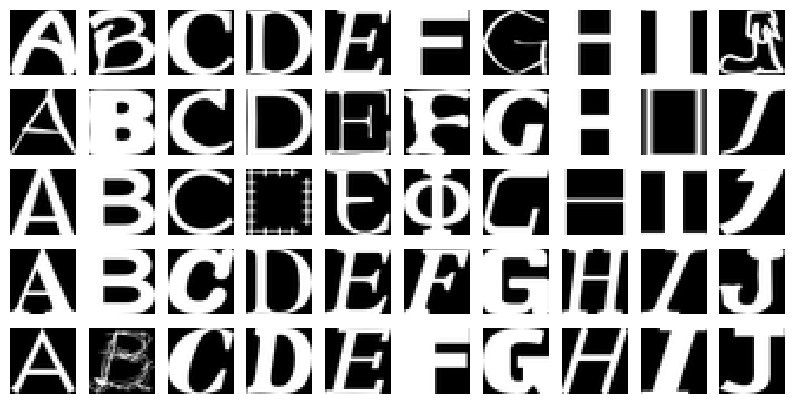

In [16]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes,rows))

for letter_id in range(classes) :
    letters = x[y==letter_id]      # 0부터 9까지 각 숫자에 맞는 array가 letters에 들어간다.
    letters_len = len(letters)

    for row_i in range(rows) :
        axe = axes[row_i, letter_id]
        axe.imshow( letters[np.random.randint(letters_len)], cmap='gray', interpolation='none')
        axe.axis('off')

## Data Preprocessing

* Data split
    - training set : test set = 8 : 2
    - training set : validation set = 8 : 2
    - 재현을 위한 난수 고정 : 2024

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2024)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=2024)

In [19]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((11983, 28, 28, 1), (11983,), (2996, 28, 28, 1), (2996,))

* Scaling

    - min-max scaling

In [20]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255.0, 0.0)

In [21]:
train_x = (train_x - min_n) / (max_n - min_n)
val_x = (val_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [22]:
train_x.max(), train_x.min()

(1.0, 0.0)

* One-hot encoding

In [23]:
train_y.shape

(11983,)

In [24]:
class_n = len(np.unique(train_y))
class_n

10

In [25]:
from keras.utils import to_categorical

In [26]:
train_y = to_categorical(train_y, class_n)
val_y = to_categorical(val_y, class_n)
test_y = to_categorical(test_y, class_n)

* Data shape 재확인

In [27]:
train_x.shape, train_y.shape

((11983, 28, 28, 1), (11983, 10))

## **Image Augmentation Layers**

In [28]:
import keras

In [39]:
aug_layers = [keras.layers.RandomRotation(factor=(-0.1,0.1)),
              keras.layers.RandomTranslation(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1)),
              keras.layers.RandomZoom(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1)),
              keras.layers.RandomFlip(mode='horizontal_and_vertical')
              ]

In [40]:
def image_augmentation(images):
    for layer in aug_layers:
        images = layer(images)
    return images

In [41]:
aug_imgs = image_augmentation(train_x[0])

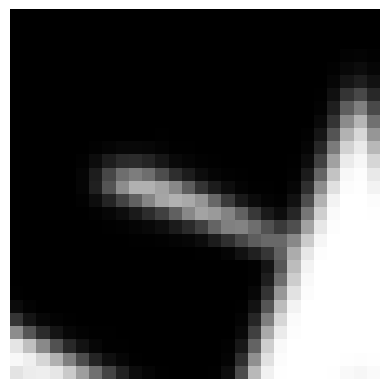

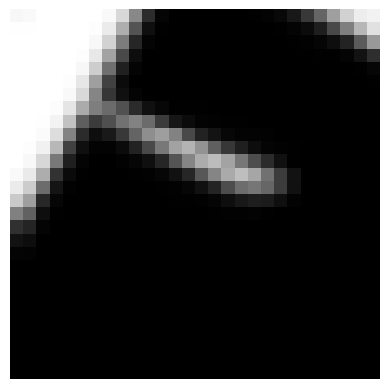

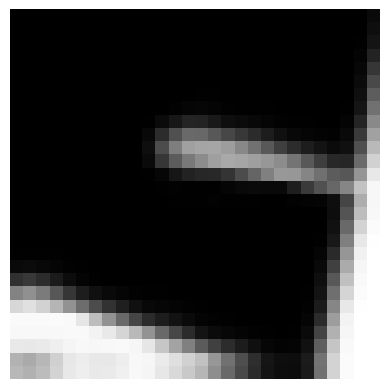

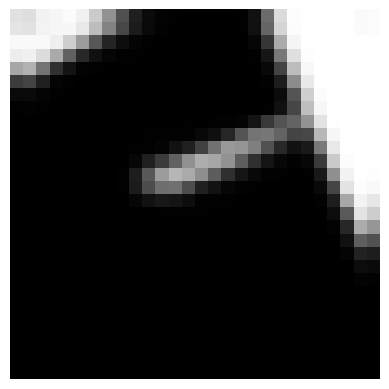

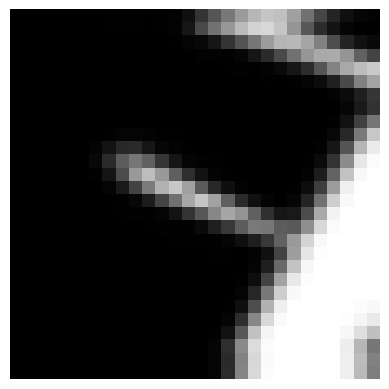

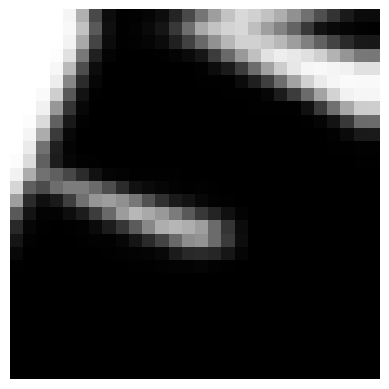

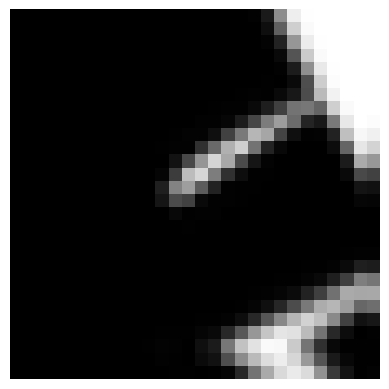

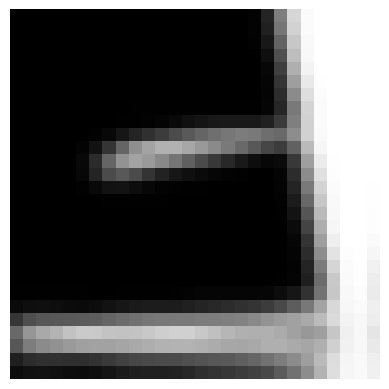

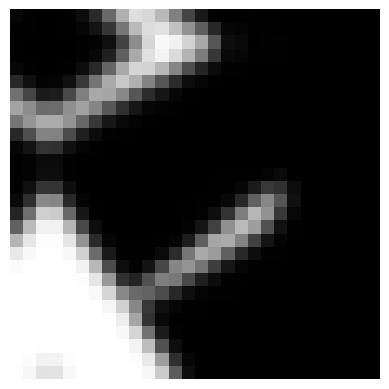

In [42]:
rand_n = np.random.randint(0, 11982)

for i in range(9) :
    aug_imgs = image_augmentation(train_x[rand_n])

    plt.imshow( np.array(aug_imgs), cmap='gray' )
    plt.axis('off')
    plt.show()

## Modeling : CNN

- 조건
    1. Sequential API, Functional API 중 택일.
    2. [이 구조를 미니 버전으로 활용해봐도 좋다.](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
    3. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
    4. Early Stopping을 사용할 것.

In [33]:
import keras

from keras.backend import clear_session
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout

In [34]:
train_x.shape, train_y.shape

((11983, 28, 28, 1), (11983, 10))

In [43]:
## Functional API
# 1. 세션 클리어
clear_session()

# 2. 레이어 엮기
il = Input(shape=(28,28,1))

## Augmentation Layer
al = keras.layers.RandomRotation(factor=(-0.3,0.3))(il)
al = keras.layers.RandomTranslation(height_factor=(-0.3,0.3), width_factor=(-0.3,0.3))(al)
al = keras.layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2))(al)
al = keras.layers.RandomFlip(mode='horizontal_and_vertical')(al)

hl = Conv2D(filters=64,        # 새롭게 제작하려는 feature map의 수! 서로 다른 filter의 수!
            kernel_size=(3,3), # Conv 필터의 가로세로
            strides=(1,1),     # Conv 필터의 이동 보폭
            padding='same',    # 1. 사이즈 유지 | 2. 외곽 정보 더 반영
            activation='relu'  # 주의!
            )(al)
hl = Conv2D(filters=64,        # 새롭게 제작하려는 feature map의 수! 서로 다른 filter의 수!
            kernel_size=(3,3), # Conv 필터의 가로세로
            strides=(1,1),     # Conv 필터의 이동 보폭
            padding='same',    # 1. 사이즈 유지 | 2. 외곽 정보 더 반영
            activation='relu'  # 주의!
            )(hl)
hl = MaxPool2D(pool_size=(2,2), # 풀링 필터의 가로세로
               strides=(2,2)    # 풀링 필터의 이동 보폭
               )(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.5)(hl)

hl = Conv2D(filters=128,        # 새롭게 제작하려는 feature map의 수! 서로 다른 filter의 수!
            kernel_size=(3,3), # Conv 필터의 가로세로
            strides=(1,1),     # Conv 필터의 이동 보폭
            padding='same',    # 1. 사이즈 유지 | 2. 외곽 정보 더 반영
            activation='relu'  # 주의!
            )(hl)
hl = Conv2D(filters=128,        # 새롭게 제작하려는 feature map의 수! 서로 다른 filter의 수!
            kernel_size=(3,3), # Conv 필터의 가로세로
            strides=(1,1),     # Conv 필터의 이동 보폭
            padding='same',    # 1. 사이즈 유지 | 2. 외곽 정보 더 반영
            activation='relu'  # 주의!
            )(hl)
hl = MaxPool2D(pool_size=(2,2), # 풀링 필터의 가로세로
               strides=(2,2)    # 풀링 필터의 이동 보폭
               )(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.5)(hl)

hl = Flatten()(hl)
hl = Dense(1024, activation='relu')(hl)

ol = Dense(10, activation='softmax')(hl)

# 3. 모델의 시작과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation                   │ (None, 28, 28, 1)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       6,423,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,693,578 (25.53 MB)

 Trainable params: 6,693,194 (25.53 MB)

 Non-trainable params: 384 (1.50 KB)

* Early Stopping

In [45]:
from keras.callbacks import EarlyStopping

In [46]:
es = EarlyStopping(monitor='val_loss',       # 얼리스토핑 적용 대상
                   min_delta=0,              # 임계값.
                   patience=3,               # 몇 번 더 지켜볼래.
                   verbose=1,
                   restore_best_weights=True # 최적의 가중치로 돌려줌.
                   )

* .fit( )

In [ ]:
model.fit(train_x, train_y,
          epochs=10000, verbose=1,
          validation_data = (val_x, val_y),
          callbacks=[es]
          )

Epoch 1/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 180s 472ms/step - accuracy: 0.2666 - loss: 2.7695 - val_accuracy: 0.2109 - val_loss: 2.1875
Epoch 2/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 183s 488ms/step - accuracy: 0.4004 - loss: 1.7082 - val_accuracy: 0.5414 - val_loss: 1.3094
Epoch 3/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 177s 473ms/step - accuracy: 0.4843 - loss: 1.5064 - val_accuracy: 0.6702 - val_loss: 1.1484
Epoch 4/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 234s 559ms/step - accuracy: 0.5406 - loss: 1.3770 - val_accuracy: 0.6999 - val_loss: 1.0897
Epoch 5/10000
 64/375 ━━━━━━━━━━━━━━━━━━━━ 2:39 512ms/step - accuracy: 0.6014 - loss: 1.2181

In [ ]:
!ls output

* .evaluate( )

In [ ]:
model.evaluate(test_x, test_y)

* .predict( )

In [ ]:
y_pred = model.predict(test_x)

In [ ]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.argmax(test_y, axis=1)

* 평가 지표

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(test_y_arg, y_pred_arg)

In [ ]:
print( classification_report(test_y_arg, y_pred_arg) )

## Visualization

* 실제 데이터 확인

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='gray')
plt.show()

* 틀린 이미지만 확인해보기

In [ ]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='gray')
plt.show()